# Perceptrons

Based on https://towardsdatascience.com/perceptron-algorithm-in-python-f3ac89d2e537

## Overview

In this notebook, we will implement the Perceptron algorithm. It is the simplest single-layer neural network algorithm and illustrates some of the fundamental aspects of artifical neural networks.

# Libraries

In [1]:
import numpy  as np
import pandas as pd

import matplotlib.pyplot as plt
import sklearn.metrics   as metric

from sklearn                 import datasets
from sklearn.neural_network  import MLPClassifier
from sklearn.linear_model    import Perceptron

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

blue   = '#0021A5'
orange = '#FA4616'

## 1. Introduction

Perceptrons are part of the important components in machine learning. A reason for developing a perceptron was that of classifying data into two categories. The idea behind it actually is based on real-life biological neurons. A perceptron may be considered an artificial neuron, or node, with the purpose of collecting the input features and then calculating a weighted sum of all these features. As a result of such process, it makes a binary decision based on the result. Hence, making it useful in binary classification problems.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Neuron.svg/640px-Neuron.svg.png" alt="Neuron" align="right" style="width:500px; float:center"/>

There are several concepts that we need to keep in mind,

- **Weights and Bias**: A perceptron weights every input parameter present in the data and then adds a bias unit. These parameters are optimized during training.

- **Activation Function**: Determines whether a neuron should be activated or not based on certain conditions, e.g., the perceptron chooses the first class if the weighted sum of inputs and the bias is larger than or equal to zero, otherwise chooses the second class.

- **Learning Rate**: Controls how quickly the neural network fits and updates the attributes learned previously.

Some of the advantages offered by preceptrons are their simplicity, computational efficiency, and good performance on linearly separable data. However, there also are disadvantages, such as the sensitivity to the initial choice for the weigths and bias, or its restriction to only provide binary ouputs, 0 or 1, that might result problematic if we are interested in computing probabilities instead.

## 2. Data

To illustrate the Perceptron algorithm for clustering, we create a dataset with two classes, orange and blue. The goal for the Perceptron algorithm is that of learning an optimal straight line that separates both classes.

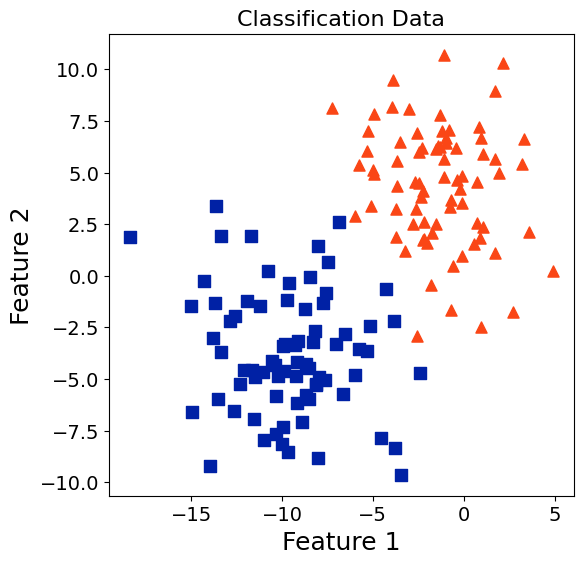

In [2]:
def plot_data(x,y, x1=None, y1=None):
    
    fig = plt.figure( figsize=(6,6) )
    
    plt.title('Classification Data', fontsize=16)
    
    plt.scatter(x[:, 0][y == 0], x[:, 1][y == 0], c=orange, marker='^', s=64)
    plt.scatter(x[:, 0][y == 1], x[:, 1][y == 1], c=blue,   marker='s', s=64)
    
    if (x1 is not None) and (y1 is not None):
        plt.plot(x1, y1, 'k-', lw=4)
    
    plt.xlabel('Feature 1', fontsize=18)
    plt.ylabel('Feature 2', fontsize=18)
    
    plt.show()
    
points = 150
X, y   = datasets.make_blobs(n_samples=points, n_features=2,
                             centers=2, cluster_std=3, random_state=1)

plot_data(X,y)

## 3. Perceptron

The Perceptron algorithm is illustrated by the following flowchart. For every training example, we first take the dot product of the input features and the parameters, $\theta$. Then, we apply the Unit Step Function to make the prediction, $\hat y$.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Computer.Science.AI.Neuron.svg/640px-Computer.Science.AI.Neuron.svg.png" alt="Perceptron" align="center" style="width:500px; float:center"/>

- If the prediction is wrong and the model has misclassified that data point, we update for the parameters, $\theta$.
- We don’t update when the prediction is correct.

The Perceptron algorithm sums the input features using weights and applies a Unit Step Function, or Heaviside function, to that sum:
$$
\sigma(z) = \begin{cases}
0 \,\, \text{if} \,\, z < 0 \\
1 \,\, \text{if} \,\, z \ge 0
\end{cases}
$$

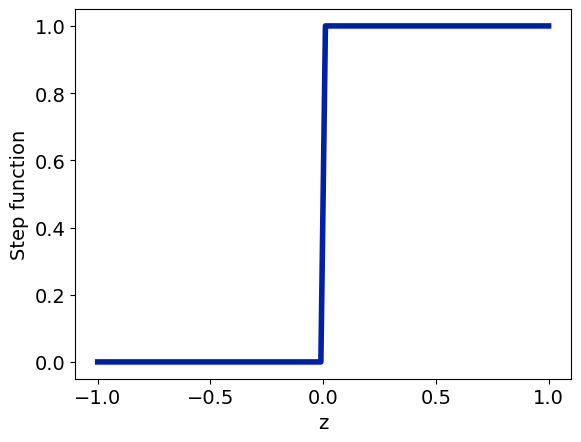

In [3]:
z     = np.linspace(-1, 1, 100)
sigma = np.heaviside(z, 1)

plt.plot(z, sigma, c=blue, lw=4)

plt.xlabel('z', fontsize=14)
plt.ylabel('Step function', fontsize=14)

plt.show()

### 3.1 Update rule

The Perceptron update rule is similar to the Gradient Descent update rule:
$$
\theta_{n+1} = \theta_n + \eta \left ( {\bf y} -\sigma(\theta \cdot {\bf X}) \right ) {\bf X}\, ,
$$
where $\eta$ is the learning rate that directly control the weights and represents how quickly the perceptron understands and updates its learning.

Let's implement our own perceptron

In [4]:
class SingleLayerPerceptron:
#
### Initialize
#
    def __init__(self, X, y):
        
        samples, features = X.shape
        
        self.X = np.asarray(X)
        self.y = np.asarray(y)
                
        self.parameters = np.zeros( (features+1,1) )
        self.X_interval = [ np.min(X[:,0]), np.max(X[:,0]) ]
#
### Training loop
#
    def fit(self, learning_rate=1e-3, epochs=100):
               
        for epoch in range(epochs):            
            for idx, X_i in enumerate(self.X):
                
                # Insert 1 for bias, X_0 = 1
                X_i = np.insert(X_i, 0, 1).reshape(-1,1)
                
                # Calculate prediction
                z = np.dot(X_i.T, self.parameters)
                
                y = np.heaviside(z, 1)
                
                # Update if the sample is missclassified
                if not y.squeeze() - self.y[idx] == 0.0:
                    self.parameters += learning_rate*(self.y[idx] - y)*X_i    
#
### Boundary
#
    def plot(self, c1=orange, c2=blue):
        
        # The equation for a line is y = mx + b
        slope = -self.parameters[1]/self.parameters[2]
        bias  = -self.parameters[0]/self.parameters[2]
        
        y = slope*self.X_interval + bias
        
        fig = plt.figure( figsize=(6,6) )
    
        plt.title('Perceptron Algorithm', fontsize=18)

        plt.scatter(self.X[:,0][self.y == 0], self.X[:,1][self.y == 0], c=orange, marker='^', s=64)
        plt.scatter(self.X[:,0][self.y == 1], self.X[:,1][self.y == 1], c=blue,   marker='s', s=64)

        plt.plot(self.X_interval, y, 'k-', lw=4)

        plt.xlabel('Feature 1', fontsize=14)
        plt.ylabel('Feature 2', fontsize=14)

        plt.show()

We can use our implementation on the data we generated previously for binary classification

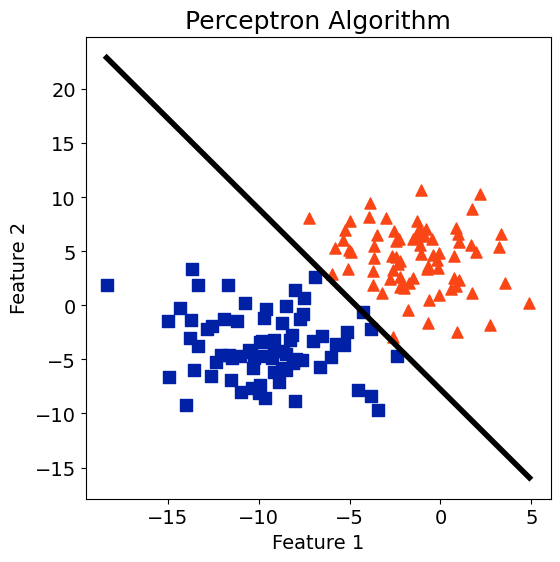

In [5]:
perceptron = SingleLayerPerceptron(X, y)

perceptron.fit(learning_rate=0.01, epochs=20)

perceptron.plot()

We observe that we are able to categorize both data classes.

> ### Assignment
>
> Try different choices for the random seed and the standard deviation for generating the data to explore how the Perceptron works for other distributions. Comment your findings

## 4. Simple perceptron with scikit-learn

Let's create a simple dataset for a square

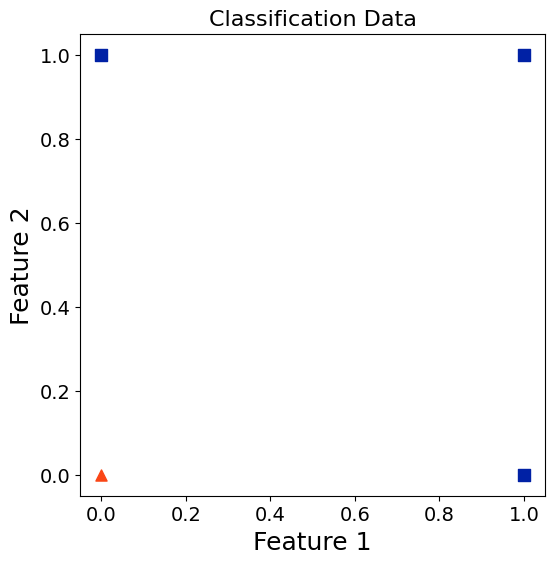

In [6]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1]) # OR gate

plot_data(X,y)

plt.show()

Instead of our implementation, we will use the `Perceptron` object provided by the scikit-learn library

In [7]:
classifier = Perceptron()

classifier.fit(X,y)

print(f'accuracy   : {classifier.score(X, y)}\n'
      f'predictions: {classifier.predict(X)}\n'
      f'expected   : {y}')

accuracy   : 1.0
predictions: [0 1 1 1]
expected   : [0 1 1 1]


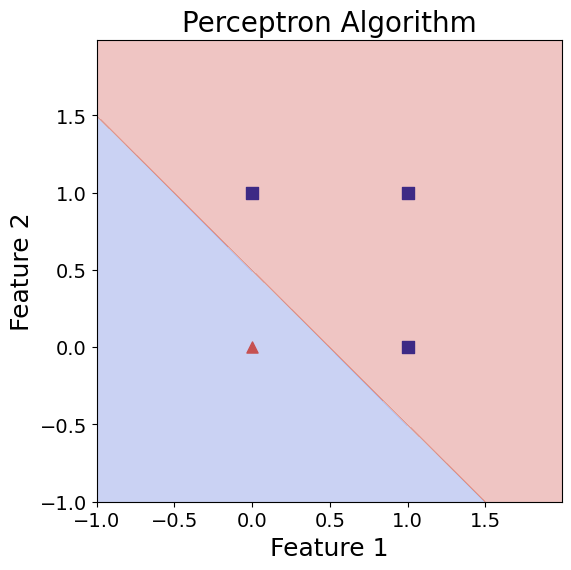

In [8]:
# Plot the decision boundary
fig = plt.figure( figsize=(6,6) )

plt.title('Perceptron Algorithm', fontsize=20)

plt.scatter(X[:,0][y == 0], X[:,1][y == 0], c=orange, marker='^', s=64)
plt.scatter(X[:,0][y == 1], X[:,1][y == 1], c=blue,   marker='s', s=64)

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                       np.arange(x2_min, x2_max, 0.01))

Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=plt.cm.coolwarm)

plt.xlabel('Feature 1', fontsize=18)
plt.ylabel('Feature 2', fontsize=18)

plt.show()

Pay closer attention to the elements in our data set. You will realize that the dataset actually is an example of a [logic gate](https://www.techtarget.com/whatis/definition/logic-gate-AND-OR-XOR-NOT-NAND-NOR-and-XNOR) AND.

> ### Assignment
>
> Modify the data for the other logic gates NOT, OR, NOR, XOR, NAND, and XNOR. What do you observe? Can the single neuron perceptron algorithm model these operations?

## 5. Multilayer perceptron

Generalizing the perceptron algorithm into one that includes multiple neurons and several layers of neurons results in a **neural network**. We can use the multilayer perceptron algorithm in scikit-learn `MLPClassifier` to train a classifier using a neural network.

In [9]:
# Routine to optimize a classifier on data X,y and plot the decision boundaries of the classifier
def plot_decision_boundaries(X, y, ax=None, mesh_step=0.1, threshold=1, model=None, **kwargs):
    
    X = np.asarray(X)
    y = np.asarray(y)
    
    # Create the object for the multilayer perceptron classifier
    classifier = model(**kwargs)
    
    # Fit the model with our data
    classifier.fit(X, y)
    
    # Compute predicted values with the MLP
    y_predicted = classifier.predict(X)
    accuracy   = metric.accuracy_score(y, y_predicted, normalize=True)
    
    # Decision boundary
    x0_min, x0_max = X[:,0].min() - threshold, X[:,0].max() + threshold
    x1_min, x1_max = X[:,1].min() - threshold, X[:,1].max() + threshold
    
    # Generate grid
    x0_mesh, x1_mesh = np.meshgrid(np.arange(x0_min, x0_max, mesh_step), np.arange(x1_min, x1_max, mesh_step))
    
    # Compute labels
    labels = Z = classifier.predict(np.c_[x0_mesh.ravel(), x1_mesh.ravel()])
    
    labels = labels.reshape(x0_mesh.shape)
    
    # Plot the classification boundaries
    
    ax.contourf(x0_mesh, x1_mesh, labels, alpha=0.4)
    
    ax.scatter(X[:,0], X[:,1], c=y, s=100, ec='k', lw=2)
    
    return accuracy

> ### Assignment
>
> Generate the data for the XOR logic gate and save it to the variable `y`

In [10]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# your code here
y = [0, 1, 1, 0] # XOR gate


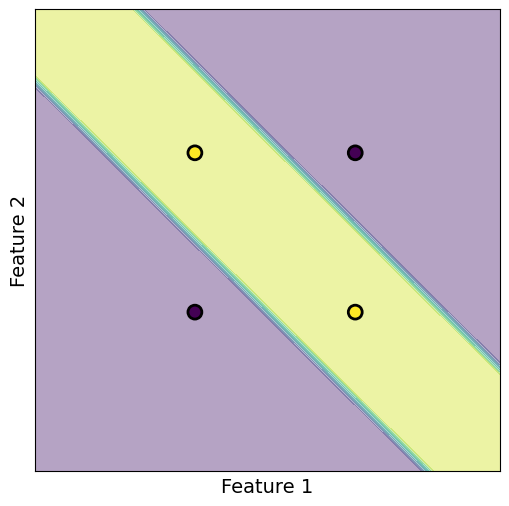

In [11]:
fig, ax = plt.subplots( figsize=(6,6) )

accuracy = plot_decision_boundaries(X, y, ax=ax, model=MLPClassifier,
                    solver='lbfgs', hidden_layer_sizes=(2),
                    activation='logistic', random_state=4)

ax.set_xlabel("Feature 1",fontsize=14)
ax.set_ylabel("Feature 2",fontsize=14)

ax.set_xticks([])
ax.set_yticks([])

plt.show()

When modifying `random_state`, you see that training a neural network classifier, you can get stuck in suboptimal local minima.
By changing the network architecture `hidden_layer_sizes=(...)` you can determine what smallest architecture can works.

`hidden_layer_sizes=(2)` works
- Input layer: 2 neurons (for the two binary inputs)
- Hidden layer: 2 neurons
- Output layer: 1 neuron

`hidden_layer_sizes=(1, 1)` does not work

Let's see quickly how our model goes from underfitting to overfitting

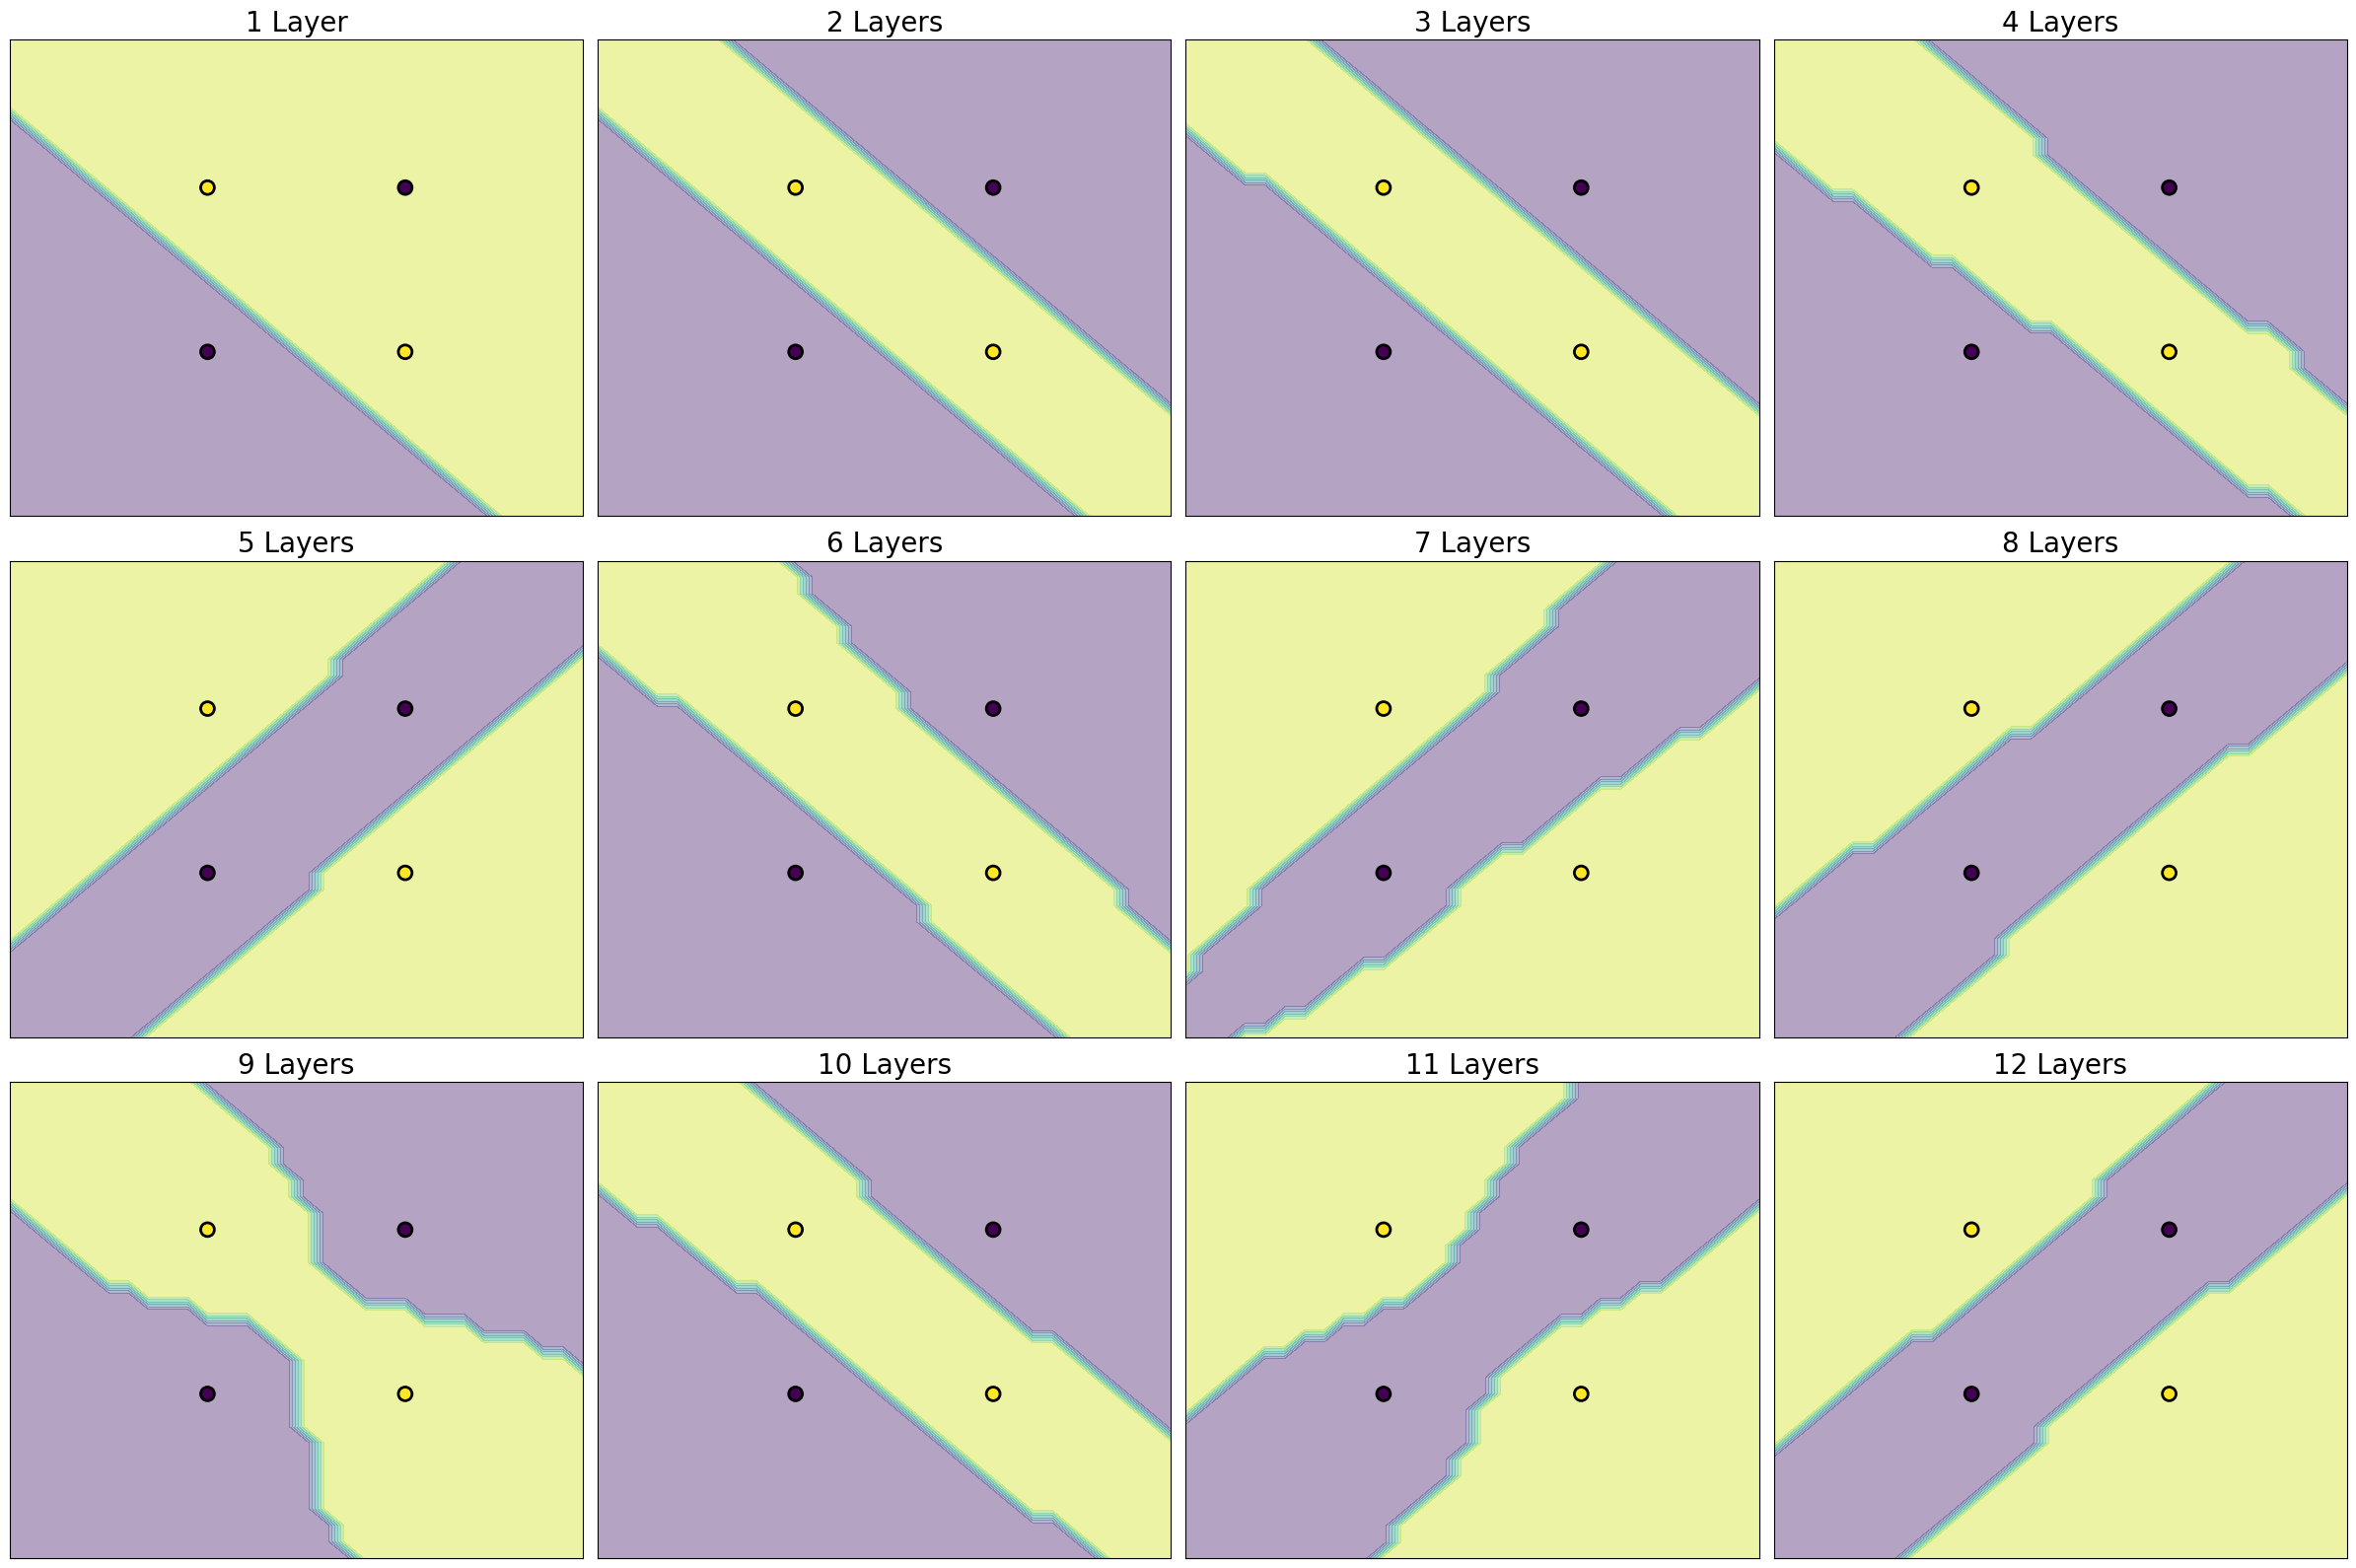

In [12]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(24,16),
                       sharex=True, sharey=True, layout='tight')

layer = 1

for row in range(ax.shape[0]):
    for col in range(ax.shape[1]):
        _ = plot_decision_boundaries(X, y,
                ax=ax[row,col], model=MLPClassifier,
                solver='lbfgs', hidden_layer_sizes=(layer),
                activation='logistic', random_state=4)
    
        ax[row,col].set_xlabel('')
        ax[row,col].set_ylabel('')

        ax[row,col].set_xticks([])
        ax[row,col].set_yticks([])
        
        ax[row,col].set_title(f'{layer} Layer{"" if layer==1 else "s"}', fontsize=20)
        
        layer += 1
        
plt.show()

> ### Assignment
>
>  Modify the parameters for the `MLPClassifier` and discuss the sensitivity of the classifier to the activation function `activation`, the optimization method `solver`, and the initial random guess `random_state`. 